## Data Downloading

Code below downloads data via Kaggle API if the files are not already present in the directory (see `/src/utilities/download_data.sh`). Additionally sets up necessary global variables for this notebook:

In [1]:
import pathlib

# Where data will be stored if not present
DATA_PATH = "../input"
! ./utilities/download_data.sh "$DATA_PATH"

# Where results of analysis are/will be stored
ANALYSIS_PATH = pathlib.Path("../analysis")
ANALYSIS_PATH.mkdir(parents=True, exist_ok=True)

test_data.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_data.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_labels.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
/home/vyz/projects/Kaggle1NN2019/src
Script ran successfully

## Feel of data

Some basics, e.g. loading `train` and `test` datasets...

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import pandas as pd
import numpy as np

from utilities.general import train_data, test_data

X, y = train_data(pathlib.Path(DATA_PATH))
X_test = test_data(pathlib.Path(DATA_PATH))

print(X_test.shape)
print(X.shape)

(10000, 342)
(59580, 342)


... distribution of `labels` might tell us whether we need upsampling (or similiar technique) or not...

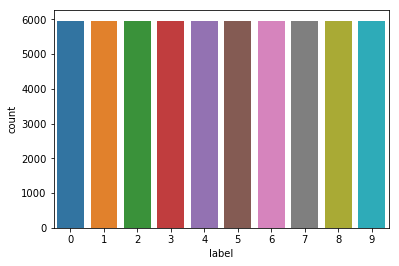

In [3]:
sns.countplot(y)

... and it seems it's not needed as samples are almost perfectly equally distributed between classes. Finally, correlation heatmap between predictors to get a deeper insight:

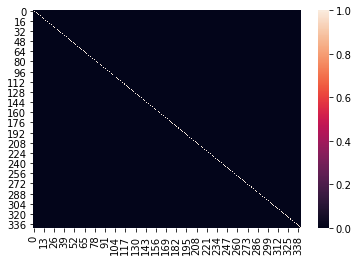

In [4]:
correlation = np.corrcoef(X, rowvar=False)
sns.heatmap(correlation)

Zero correlation and indicates we are dealing with generated and not real life data.

# Data statistics

Below one can find useful informations about our data, those will help us decide what kind of preprocessing will be needed (if any):

### Variance Inflation Factor (VIF)

Variables scoring highest (`5` is the usual value, `10` is it's conservative counterpart) will be removed from dataset. Those values indicate high multicollinearity between features.

All `VIF` values will be one as no feature has any correlation with another whatsoever.
You can see it on your own below:

In [5]:
from utilities.analysis import vifs

vifs(ANALYSIS_PATH / pathlib.Path("VIF.csv"), X)

Results stored, retrieving...


,VIF
325,1.0
333,1.0
340,1.0
332,1.0
341,1.0
296,1.0
336,1.0
326,1.0
335,1.0
317,1.0


As data is perfectly uncorrelated, __VIF__ is equal to one for every column (we cannot infer it's value from other independent variables), hence we shouldn't delete any column based on this trait.

### Skewness

Highly skewed data may affect (e.g. slow down) learning process of neural network.

If features with those characteristics exist, they should be transformed using `log` function or other similar (`box-cox` will be used in the next notebook).

In [6]:
from utilities.analysis import skewness

skewness(ANALYSIS_PATH / pathlib.Path("skew.csv"), X)

Results stored, retrieving...


,skew,statistic,pvalue
2,0.456771,43.431856,0.000000e+00
24,0.285750,27.927158,1.248967e-171
7,0.242853,23.859921,7.989099e-126
27,0.237546,23.352532,1.298891e-120
10,0.236680,23.269640,9.001182e-120
0,0.181983,17.989895,2.338000e-72
3,0.169591,16.782564,3.273906e-63
8,0.156937,15.545959,1.694662e-54
37,0.149868,14.853565,6.596549e-50
26,0.149086,14.776877,2.065239e-49


Skewness of features is really low (smaller than `0.5`), hence no transformation will probably help.

__Mean__ of each feature shows us where the center of gaussian distribution is:

In [7]:
from utilities.analysis import mean

mean(ANALYSIS_PATH / pathlib.Path("mean.csv"), X)

Results stored, retrieving...


,mean
298,-3.222558e-07
232,-2.802954e-07
279,-2.786170e-07
119,-2.685465e-07
220,-2.618328e-07
338,-2.584760e-07
281,-2.551192e-07
81,-2.450487e-07
270,-2.299429e-07
204,-2.181940e-07


... and it's pretty much zero so moving distributions shouldn't have much (if any) effect either.

### Variance

Usually data possesing even a really small variance __is not__ removed as it often hurts model performance in the long run.

Just in case, below one can see predictors with the smallest variance:

In [8]:
from utilities.analysis import variance

variance = variance(ANALYSIS_PATH / pathlib.Path("variance.csv"), X)

variance

Results stored, retrieving...


,variance
341,0.006892
340,0.006936
339,0.006974
338,0.007029
337,0.007139
336,0.007207
335,0.007258
334,0.007282
333,0.007322
332,0.007359


It looks like the variance is steadily dropping as the index of feature increases.

This points us towards to the conclusion that this data was artificially generated just for the sake of this competition (well, I probably shouldn't have told that to every participant).

Plotting variance against indices __does not__ indicate any function generating features I know (or could sensibly replicate), neither can I understand the process generating targets.

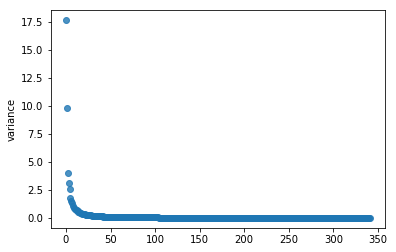

In [9]:
sns.regplot(x=variance.index.values, y=variance["variance"], fit_reg=False, scatter=True)

### Feature importance

Finally, we can check which features are important for our classification task.
To save some computation time I'm only using two statistical tests, precisely `anova` and `mutual information`, no funny stuff like [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html):

In [10]:
from utilities.analysis import feature_importance

feature_importance = feature_importance(
    ANALYSIS_PATH / pathlib.Path("feature_importance.csv"), X, y
)

feature_importance

Results stored, retrieving...


,anova,pvalue,mutual,mix
1,17432.016693,0.000000e+00,0.692787,12076.666427
0,7105.109501,0.000000e+00,0.477617,3393.519462
2,4009.562390,0.000000e+00,0.262971,1054.397726
7,3777.674519,0.000000e+00,0.271501,1025.642619
4,2963.809684,0.000000e+00,0.227595,674.547200
6,1688.679087,0.000000e+00,0.185836,313.816561
3,1529.844775,0.000000e+00,0.234468,358.700394
11,1373.481159,0.000000e+00,0.154439,212.119098
14,858.612196,0.000000e+00,0.128748,110.544339
8,821.110702,0.000000e+00,0.128077,105.165631


It might be useful as well to check feature's importance using some kind of classification model. `RandomForest` is my algorithm of choice as it's not biased towards neural networks (which will be used for classification), so it allows us to generalize feature's importance in non-model specific way.

In [11]:
from utilities.analysis import rf_feature_importance

rf_feature_importance = rf_feature_importance(
    ANALYSIS_PATH / pathlib.Path("rf_feature_importance.csv"), X, y, random_state=0
)

rf_feature_importance

Results stored, retrieving...


,importance
1,0.067963
0,0.047087
2,0.035552
7,0.033523
4,0.028876
3,0.026638
6,0.022032
9,0.020361
11,0.019710
5,0.018681
